Final Blended RGB (in [0..1]) = [1.000e-04 9.446e-01 4.740e-02]
Target          RGB (in [0..1]) = [0.  0.5 0.5]


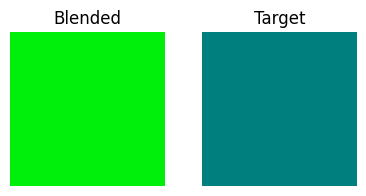

C:\Users\Matyanson\AppData\Local\Temp\ipykernel_19852\2542068208.py:88: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle(


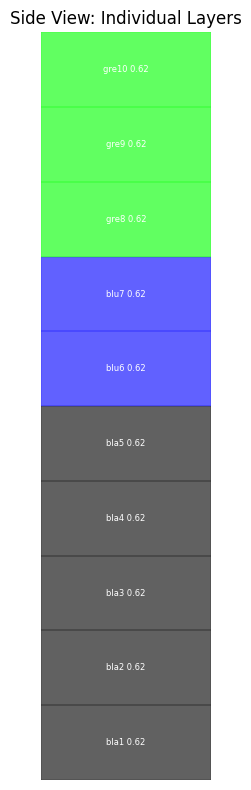

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define available filaments (RGB in [0..1])
filaments = {
    'black': {
        'rgb': [0.0, 0.0, 0.0],
    },
    'blue': {
        'rgb': [0.0, 0.0, 1.0],
    },
    'green': {
        'rgb': [0.0, 1.0, 0.0],
    },
    'red': {
        'rgb': [1.0, 0.0, 0.0],
    },
    'white': {
        'rgb': [1.0, 1.0, 1.0],
    },
}

# 2) Choose a base color (underneath layer 0)
base_color = [1.0, 1.0, 1.0]  # white background

# 3) Define a target color for comparison
target_color = [0.0, 0.5, 0.5]  # custom teal

# 4) Define each individual layer: a list of (filament_name, thickness_mm)
#    For example, 10 total layers of 0.2mm each: 5x black, 2x blue, 3x green
layers = [
    ('black', 0.2),  # layer 1
    ('black', 0.2),  # layer 2
    ('black', 0.2),  # layer 3
    ('black', 0.2),  # layer 4
    ('black', 0.2),  # layer 5 (total black thickness = 1.0mm)
    ('blue',  0.2),  # layer 6
    ('blue',  0.2),  # layer 7 (blue total = 0.4mm)
    ('green', 0.2),  # layer 8
    ('green', 0.2),  # layer 9
    ('green', 0.2),  # layer 10 (green total = 0.6mm)
]

def alpha_from_thickness(x):
    """
    Convert a layer of thickness x (in mm) to an effective opacity using:
      alpha = (exp(-2x) - exp(-2)) / (1 - exp(-2))
    This maps x=0  -> alpha=1
             x=1  -> alpha=0
    Layers thicker than 1mm become even more transparent (alpha<0).
    In practice, x will be <1mm for each individual layer.
    """
    return (np.exp(-2 * x) - np.exp(-2)) / (1 - np.exp(-2))

def composite_over(base_rgb, top_rgb, top_alpha):
    return top_alpha * top_rgb + (1 - top_alpha) * base_rgb

# Blend layer by layer
current_rgb = np.array(base_color, dtype=float)
for name, thickness in layers:
    rgb = np.array(filaments[name]['rgb'], dtype=float)
    alpha = alpha_from_thickness(thickness)
    current_rgb = composite_over(current_rgb, rgb, alpha)

blended = current_rgb

print("Final Blended RGB (in [0..1]) =", np.round(blended, 4))
print("Target          RGB (in [0..1]) =", np.round(target_color, 4))

# 5) Show a side-by-side comparison of the blended vs. target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.imshow(np.ones((10,10,3)) * blended.reshape((1,1,3)))
ax1.set_title("Blended")
ax2.imshow(np.ones((10,10,3)) * np.array(target_color).reshape((1,1,3)))
ax2.set_title("Target")
for ax in (ax1, ax2):
    ax.axis('off')
plt.tight_layout()
plt.show()

# 6) Visualize each individual layer from the side
total_thickness = sum(thickness for _, thickness in layers)
fig2, ax2 = plt.subplots(figsize=(2, max(4, total_thickness * 4)))
y_bottom = 0
for i, (name, thickness) in enumerate(layers, start=1):
    rgb = filaments[name]['rgb']
    alpha = alpha_from_thickness(thickness)
    rect = plt.Rectangle(
        (0, y_bottom), 1, thickness,
        color=(rgb[0], rgb[1], rgb[2], alpha),
        edgecolor='black',
        linewidth=0.3
    )
    ax2.add_patch(rect)
    # Label each layer with its index for clarity
    ax2.text(
        0.5, y_bottom + thickness / 2,
        f"{name[:3]}{i} {round(alpha, 2)}",
        va='center', ha='center',
        color='white' if sum(rgb)/3 < 0.5 else 'black',
        fontsize=6
    )
    y_bottom += thickness

ax2.set_xlim(0, 1)
ax2.set_ylim(0, total_thickness)
ax2.axis('off')
ax2.set_title("Side View: Individual Layers")
plt.tight_layout()
plt.show()


Final Blended RGB (in [0..1]) = [0.1116 0.505  0.495 ]
Target          RGB (in [0..1]) = [0.  0.5 0.5]


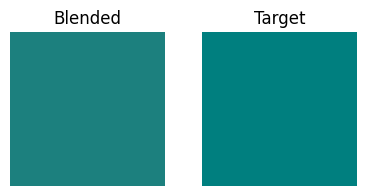

C:\Users\Matyanson\AppData\Local\Temp\ipykernel_19852\2048279497.py:83: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  rect = plt.Rectangle(
C:\Users\Matyanson\AppData\Local\Temp\ipykernel_19852\2048279497.py:105: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


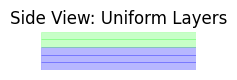

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define available filaments (RGB in [0..1] and TD in mm)
filaments = {
    'black': {
        'rgb': [0.0, 0.0, 0.0],
        'td': 0.5,   # Transmission Distance in mm
    },
    'blue': {
        'rgb': [0.0, 0.0, 1.0],
        'td': 0.3,
    },
    'green': {
        'rgb': [0.0, 1.0, 0.0],
        'td': 0.4,
    },
    'red': {
        'rgb': [1.0, 0.0, 0.0],
        'td': 0.2,
    },
    'white': {
        'rgb': [1.0, 1.0, 1.0],
        'td': 0.7,
    },
}

# 2) Global layer thickness (same for all layers)
layer_thickness = 0.1  # mm per layer

# 3) Base color underneath all layers
base_color = [0.5, 0.5, 0.5]  # white background

# 4) Target color for comparison
target_color = [0.0, 0.5, 0.5]  # custom teal

# 5) Define the stack as a list of filament names (each entry is one layer)
#    Example: 5 black layers, 2 blue layers, 3 green layers
layers = ['blue'] * 3 + ['green'] * 2

def alpha_from_td(thickness, td):
    """
    Convert thickness (mm) and transmission distance (mm) to an opacity:
      alpha = 1 - exp(-thickness / td)
    """
    return 1 - np.exp(-thickness / td)

def composite_over(base_rgb, top_rgb, top_alpha):
    return top_alpha * top_rgb + (1 - top_alpha) * base_rgb

# Blend layer by layer using TD-based alpha
current_rgb = np.array(base_color, dtype=float)
for i, name in enumerate(layers, start=1):
    rgb = np.array(filaments[name]['rgb'], dtype=float)
    td = filaments[name]['td']
    alpha = alpha_from_td(layer_thickness, td)
    current_rgb = composite_over(current_rgb, rgb, alpha)

blended = current_rgb

print("Final Blended RGB (in [0..1]) =", np.round(blended, 4))
print("Target          RGB (in [0..1]) =", np.round(target_color, 4))

# 6) Show a side-by-side comparison of blended vs. target
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(4, 2))
ax1.imshow(np.ones((10,10,3)) * blended.reshape((1,1,3)))
ax1.set_title("Blended")
ax2.imshow(np.ones((10,10,3)) * np.array(target_color).reshape((1,1,3)))
ax2.set_title("Target")
for ax in (ax1, ax2):
    ax.axis('off')
plt.tight_layout()
plt.show()

# 7) Visualize each layer from the side with uniform thickness
total_thickness = layer_thickness * len(layers)
fig2, ax2 = plt.subplots(figsize=(2, total_thickness))
y_bottom = 0
for i, name in enumerate(layers, start=1):
    rgb = filaments[name]['rgb']
    td = filaments[name]['td']
    alpha = alpha_from_td(layer_thickness, td)
    rect = plt.Rectangle(
        (0, y_bottom), 1, layer_thickness,
        color=(rgb[0], rgb[1], rgb[2], alpha),
        edgecolor='black',
        linewidth=0.5
    )
    ax2.add_patch(rect)
    # ax2.text(
    #     0.5, y_bottom + layer_thickness / 2,
    #     f"{name[:3]}{i} : {round(alpha, 2)}",
    #     va='center', ha='center',
    #     color='white' if sum(rgb)/3 * (1.0 - alpha) < 0.15 else 'black',
    #     fontsize=6
    # )
    y_bottom += layer_thickness

ax2.set_xlim(0, 1)
ax2.set_ylim(0, total_thickness)
ax2.set_aspect('auto')
ax2.axis('off')
ax2.set_title("Side View: Uniform Layers")

plt.tight_layout()
plt.show()
